<h1><center>Customer Data Exploration</center></h1>

## 1. Load Data

### 1.1 Libraries

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(8675309)

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, learning_curve

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

from sklearn.metrics import f1_score, confusion_matrix, classification_report, silhouette_score

sns.set(style='ticks',palette='pastel',font_scale=1.3)

### 1.2 Data

<b>Data Dictionary</b>
<ul>
    <li>"index": the unique ID to identify each row starting with 0</li>
    <li>"response": 1 for question not answered and 0 for question answered</li>
    <li>"IL1": CSA (customer service agent) identified issue level 1</li>
    <li>"IL2": CSA identified issue level 2</li>
    <li>"IL3": CSA identified issue level 3</li>
    <li>"IL4": CSA identified issue level 4</li>
<li>"CIL1": customer identified issue level 1</li>
<li>"CIL2": customer identified issue level 2</li>
<li>"CIL3": customer identified issue level 3</li>
<li>"CLI4": customer identified issue level 4</li>
<li>"prime": 1 for prime customer, 0 for not prime customer</li>
<li>"score1": a score related to customer's technical savviness level (higher is more savvy)</li>
<li>"score2": a score related to likelihood of repeat contact (higher is more likely)</li>
<li>"score3": a score related to likelihood of repeat contact (higher is more likely)</li>
<li>"score4": a score related to likelihood of repeat contact (higher is more likely)</li>
<li>"score5": a score related to likelihood of repeat contact (higher is more likely)</li>
<li>"contact_type": a variable related to masked contact type</li>
<li>"day": day of the week with Monday=0 and Sunday=6</li>
<li>"hour": hour of the day in 24 hour format</li>
<li>"device": a masked device code name Metrics</li>
</ul>

In [23]:
df_train = pd.read_csv('train_filled.csv')
df_train.head()

,ID,response,IL1,IL2,IL3,IL4,CIL1,CIL2,CIL3,CLI4,prime,score1,score2,score3,score4,score5,contact_type,day,hour,device
0,4569,1,Account Assistance / Mycd Settings,Payment Assistance,1-Click Setup,C. Education - Instructions Provided,Not Specified,Not Specified,Not Specified,Not Specified,0,0.05,0.272083,29.264641,18.22433,5.465931,Not Specified,3,8,D-51
1,4402,0,Freetime,Freetime Unlimited / Subscription,Refund,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0,0.10,0.272083,29.264641,18.22433,5.465931,Not Specified,3,4,D-37
2,9533,0,Content,Content Quality,Corrupt - Won'T Open,Updated Content,Not Specified,Not Specified,Not Specified,Not Specified,1,2.00,0.272083,29.264641,18.22433,5.465931,Not Specified,0,15,D-24
3,9981,0,Kindle Tablet,Alexa On Tablet,Basic Info / How-To,C. Education - General Info,Not Specified,Not Specified,Not Specified,Not Specified,0,0.00,0.272083,29.264641,18.22433,5.465931,Not Specified,1,8,D-16
4,1849,0,Content,Book Syncing & Download Issues,Stuck In To Do Queue,Hard Restart - Fixed Issue,Not Specified,Not Specified,Not Specified,Not Specified,0,1.25,0.272083,29.264641,18.22433,5.465931,Not Specified,5,7,D-6


In [24]:
print(df_train.info())
df_train.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6815 entries, 0 to 6814
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6815 non-null   int64  
 1   response      6815 non-null   int64  
 2   IL1           6815 non-null   object 
 3   IL2           6815 non-null   object 
 4   IL3           6815 non-null   object 
 5   IL4           6815 non-null   object 
 6   CIL1          6815 non-null   object 
 7   CIL2          6815 non-null   object 
 8   CIL3          6815 non-null   object 
 9   CLI4          6815 non-null   object 
 10  prime         6815 non-null   int64  
 11  score1        6815 non-null   float64
 12  score2        6815 non-null   float64
 13  score3        6815 non-null   float64
 14  score4        6815 non-null   float64
 15  score5        6815 non-null   float64
 16  contact_type  6815 non-null   object 
 17  day           6815 non-null   int64  
 18  hour          6815 non-null 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,6815,NaN,NaN,NaN,6907.2,4016.89,1,3423.5,6891,10372.5,13911
response,6815,NaN,NaN,NaN,0.0856933,0.279931,0,0,0,0,1
IL1,6815,51,Content,2534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IL2,6815,193,Basic Info / How-To,692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IL3,6815,491,Accidental Order,607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IL4,6815,512,Refunded,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIL1,6815,15,Not Specified,5145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIL2,6815,54,Not Specified,5169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIL3,6815,122,Not Specified,5309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLI4,6815,33,Not Specified,6492,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_test = pd.read_csv('test_filled.csv')
df_test.head()

,ID,IL1,IL2,IL3,IL4,CIL1,CIL2,CIL3,CLI4,prime,score1,score2,score3,score4,score5,contact_type,day,hour,device
0,3359,3rd Party Music,Vevo,Basic Info / How-To,C. Education - App Info,Not Specified,Not Specified,Not Specified,Not Specified,1,0.000000,0.272083,29.264641,18.22433,5.465931,Not Specified,6,15,D-27
1,13318,3rd Party Music,Pandora,Issues,Instructions Sent / Asked Customer To Call,Carnac Suggested,Amazon Devices,Fire TV,Not Specified,1,0.000000,0.167584,25.000000,0.00000,100.000000,4.0,6,11,D-70
2,5956,3rd Party Music,Vevo,Basic Info / How-To,C. Education - App Info,Not Specified,Not Specified,Not Specified,Not Specified,1,1.500000,0.272083,29.264641,18.22433,5.465931,Not Specified,3,8,D-45
3,11408,3rd Party Music,Vevo,Basic Info / How-To,C. Education - App Info,Not Specified,Not Specified,Not Specified,Not Specified,0,0.459628,0.272083,29.264641,18.22433,5.465931,Not Specified,6,7,D-70
4,11577,3rd Party Tv / Video,Hulu,On Device Subscription Offer,C. Education - General Info,Not Specified,Not Specified,Not Specified,Not Specified,0,0.100000,0.272083,29.264641,18.22433,5.465931,Not Specified,3,9,D-27


In [27]:
print(df_test.info())
df_test.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923 entries, 0 to 2922
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2923 non-null   int64  
 1   IL1           2923 non-null   object 
 2   IL2           2923 non-null   object 
 3   IL3           2923 non-null   object 
 4   IL4           2923 non-null   object 
 5   CIL1          2923 non-null   object 
 6   CIL2          2923 non-null   object 
 7   CIL3          2923 non-null   object 
 8   CLI4          2923 non-null   object 
 9   prime         2923 non-null   int64  
 10  score1        2923 non-null   float64
 11  score2        2923 non-null   float64
 12  score3        2923 non-null   float64
 13  score4        2923 non-null   float64
 14  score5        2923 non-null   float64
 15  contact_type  2923 non-null   object 
 16  day           2923 non-null   int64  
 17  hour          2923 non-null   int64  
 18  device        2923 non-null 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2923,NaN,NaN,NaN,7086.56,4013.16,0,3657,7196,10541.5,13908
IL1,2923,38,Content,1077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IL2,2923,148,Basic Info / How-To,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IL3,2923,332,Payment / Subscription Issues,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IL4,2923,357,Refunded,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIL1,2923,13,Not Specified,2210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIL2,2923,41,Not Specified,2217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIL3,2923,66,Not Specified,2279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLI4,2923,18,Not Specified,2776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prime,2923,NaN,NaN,NaN,0.550462,0.497532,0,0,1,1,1


In [28]:
df_train_oh = pd.read_csv('train_oh.csv')
df_train_oh.head()

,ID,response,prime,score1,score2,score3,score4,score5,day,hour,...,device_D-58,device_D-36,device_D-26,device_D-61,device_D-69,device_D-21,device_D-60,device_D-2,device_D-30,device_D-18
0,4569,1,0,0.05,0.272083,29.264641,18.22433,5.465931,3,8,...,0,0,0,0,0,0,0,0,0,0
1,4402,0,0,0.10,0.272083,29.264641,18.22433,5.465931,3,4,...,0,0,0,0,0,0,0,0,0,0
2,9533,0,1,2.00,0.272083,29.264641,18.22433,5.465931,0,15,...,0,0,0,0,0,0,0,0,0,0
3,9981,0,0,0.00,0.272083,29.264641,18.22433,5.465931,1,8,...,0,0,0,0,0,0,0,0,0,0
4,1849,0,0,1.25,0.272083,29.264641,18.22433,5.465931,5,7,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_test_oh = pd.read_csv('test_oh.csv')
df_test_oh.head()

,ID,prime,score1,score2,score3,score4,score5,day,hour,IL1_Account Assistance / Mycd Settings,...,device_D-58,device_D-36,device_D-26,device_D-61,device_D-69,device_D-21,device_D-60,device_D-2,device_D-30,device_D-18
0,3359,1,0.000000,0.272083,29.264641,18.22433,5.465931,6,15,0,...,0,0,0,0,0,0,0,0,0,0
1,13318,1,0.000000,0.167584,25.000000,0.00000,100.000000,6,11,0,...,0,0,0,0,0,0,0,0,0,0
2,5956,1,1.500000,0.272083,29.264641,18.22433,5.465931,3,8,0,...,0,0,0,0,0,0,0,0,0,0
3,11408,0,0.459628,0.272083,29.264641,18.22433,5.465931,6,7,0,...,0,0,0,0,0,0,0,0,0,0
4,11577,0,0.100000,0.272083,29.264641,18.22433,5.465931,3,9,0,...,0,0,0,0,0,0,0,0,0,0


## Q1

In [45]:
train = df_train_oh.drop(['ID', 'response'], axis=1)
pred = df_train_oh['response']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(train,
                                                    pred,
                                                    test_size=0.3, random_state=0)

In [87]:
# build the pipeline
ppl = Pipeline([
              ('std_scaler', StandardScaler()),
              ('pca', PCA(n_components=20, random_state=0)),
              ('dtc', DecisionTreeClassifier(random_state=0))
              ])

# train the classifier
model = ppl.fit(X_train, y_train)

In [76]:
# test the classifier
y_pred = model.predict(X_test)

In [88]:
cv_scores = cross_val_score(model, X_train, y_train, scoring='f1')
print('Mean score is {}'.format(np.mean(cv_scores)))
print('Score STD is {}'.format(np.std(cv_scores)))

Mean score is 0.14599929350112428
Score STD is 0.03018836112556135


## Q2

In [93]:
params = {'pca__n_components': [5, 10, 20],
          'dtc__class_weight': [{0:1, 1:i} for i in [1, 4, 16, 64]]}

grid = GridSearchCV(ppl, param_grid=params, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print(grid.best_params_)

print(grid.best_score_)

{'dtc__class_weight': {0: 1, 1: 1}, 'pca__n_components': 20}
0.14599929350112428


In [94]:
ppl_ = grid.best_estimator_

In [95]:
# train the classifier
model_ = ppl_.fit(X_train, y_train)

In [96]:
cv_scores = cross_val_score(model_, X_train, y_train, scoring='f1')
print('Mean score is {}'.format(np.mean(cv_scores)))
print('Score STD is {}'.format(np.std(cv_scores)))

Mean score is 0.14599929350112428
Score STD is 0.03018836112556135


## Q3

In [104]:
feat_imp = model_['dtc'].feature_importances_

In [105]:
exp_var = model_['pca'].explained_variance_

In [111]:
for i, (v, f) in enumerate(zip(exp_var, feat_imp)):
    print('The {}th column explains {} variance and has importance {}'.format(i, round(v, 2), round(f, 3)))

The 0th column explains 6.38 variance and has importance 0.044
The 1th column explains 5.69 variance and has importance 0.034
The 2th column explains 5.06 variance and has importance 0.062
The 3th column explains 4.24 variance and has importance 0.078
The 4th column explains 4.16 variance and has importance 0.051
The 5th column explains 4.12 variance and has importance 0.021
The 6th column explains 4.07 variance and has importance 0.046
The 7th column explains 4.03 variance and has importance 0.035
The 8th column explains 4.02 variance and has importance 0.044
The 9th column explains 3.98 variance and has importance 0.068
The 10th column explains 3.97 variance and has importance 0.044
The 11th column explains 3.93 variance and has importance 0.054
The 12th column explains 3.93 variance and has importance 0.065
The 13th column explains 3.88 variance and has importance 0.059
The 14th column explains 3.84 variance and has importance 0.064
The 15th column explains 3.81 variance and has imp

The features that explains lots of variance are not the ones that have the most importance.<br>
This means that:
<ol>
    <li>The dtc model has lowis attributing feature experience falsely</li>
    <li>The variance of samples are not the most predictive.</li>
</ol>

In [118]:
num_size = 100
training_sizes = np.linspace(1/num_size,1,num_size)

In [122]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = model_,
    X = train, y = pred,
    train_sizes=training_sizes,
    shuffle=True, cv=5, 
    scoring = 'f1',
    random_state=42
)

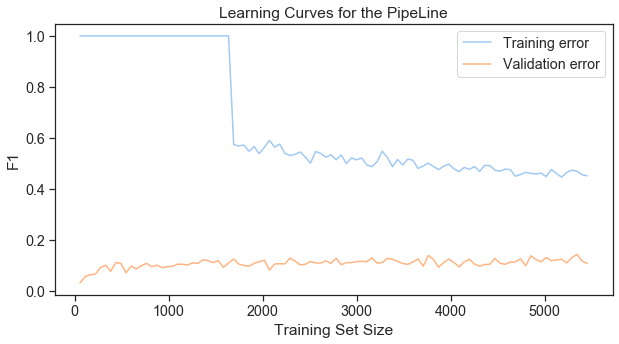

In [125]:
plt.subplots(figsize=(10,5))
plt.plot(train_sizes, train_scores.mean(axis=1), label = 'Training error')
plt.plot(train_sizes, validation_scores.mean(axis=1), label = 'Validation error')
plt.ylabel('F1')
plt.xlabel('Training Set Size')
plt.title('Learning Curves for the PipeLine')
plt.legend()
plt.show()

The generation gap between the training error and validation error curves is large - this model has high bias and is overfitting the training set. Moreover, the two curves seem to be reaching constant values as the training set size grows, so adding more training data is unlikely to make the model better.

## Q5

In [131]:
neg_cols = ['ID', 'response', 'prime', 'score1', 'score2', 'score3', 'score4', 'score5', 'day', 'hour']

In [141]:
df_train_cat = df_train_oh[[col for col in df_train_oh.columns if col not in neg_cols]]

In [142]:
std = StandardScaler()

In [143]:
std.fit(df_train_cat)

StandardScaler()

In [146]:
df_train_cat_ = pd.DataFrame(std.transform(df_train_cat))

### 1. KMeans on categories

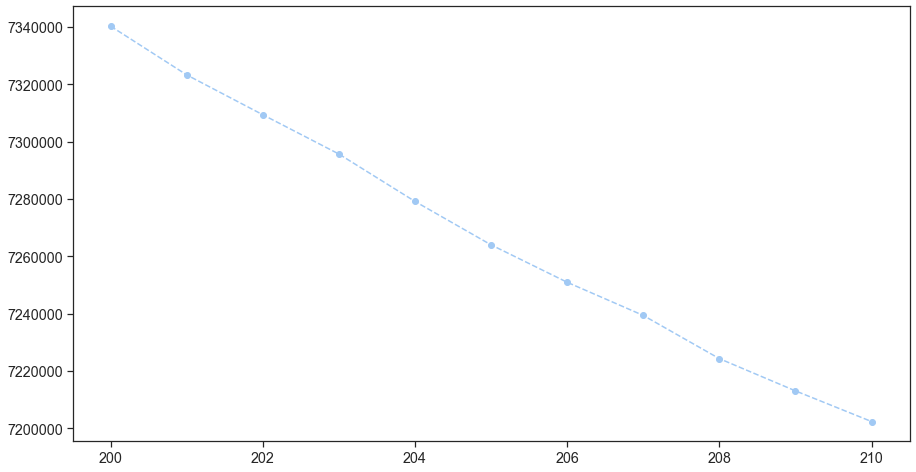

In [149]:
kmeans_inertia = []
r = range(200, 211)
for i in r:
    kmeans = KMeans(n_clusters=i,random_state=50)
    kmeans.fit(df_train_cat_)
    kmeans_inertia.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(r, kmeans_inertia, marker='o', linestyle='--')

Doesn't work so well.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(train,
                                                    pred,
                                                    test_size=0.3, random_state=0)

### Logistic Regression

In [150]:
# build the pipeline
ppl = Pipeline([
              ('std_scaler', StandardScaler()),
              ('pca', PCA(n_components=20, random_state=0)),
              ('lr', LogisticRegression(random_state=0))
              ])

# train the classifier
model = ppl.fit(X_train, y_train)

In [88]:
cv_scores = cross_val_score(model, X_train, y_train, scoring='f1')
print('Mean score is {}'.format(np.mean(cv_scores)))
print('Score STD is {}'.format(np.std(cv_scores)))

Mean score is 0.14599929350112428
Score STD is 0.03018836112556135


In [161]:
params = {'pca__n_components': [10, 15, 20],
          'lr__C': [1e-9, 1e-7, 1e-5, 1e-3],
          'lr__class_weight': [{0:1, 1:i} for i in [5, 10, 20, 30]]}

grid = GridSearchCV(ppl, param_grid=params, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print(grid.best_params_)

print(grid.best_score_)

{'lr__C': 0.001, 'lr__class_weight': {0: 1, 1: 10}, 'pca__n_components': 20}
0.17461106312259575


In [162]:
ppl_ = grid.best_estimator_

In [163]:
# train the classifier
model_ = ppl_.fit(X_train, y_train)

In [164]:
cv_scores = cross_val_score(model_, X_train, y_train, scoring='f1')
print('Mean score is {}'.format(np.mean(cv_scores)))
print('Score STD is {}'.format(np.std(cv_scores)))

Mean score is 0.17461106312259575
Score STD is 0.02353929474026244


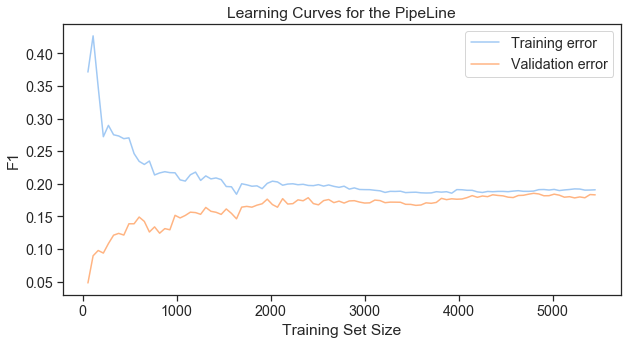

In [179]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = model_,
    X = train, y = pred,
    train_sizes=training_sizes,
    shuffle=True, cv=5, 
    scoring = 'f1',
    random_state=42
)
plt.subplots(figsize=(10,5))
plt.plot(train_sizes, train_scores.mean(axis=1), label = 'Training error')
plt.plot(train_sizes, validation_scores.mean(axis=1), label = 'Validation error')
plt.ylabel('F1')
plt.xlabel('Training Set Size')
plt.title('Learning Curves for the PipeLine')
plt.legend()
plt.show()

If using logreg, the scores converge relatively well, but there is high bias, and the model is slightly overfitting.<br>
Possibly the PCA is generalizing too much?

In [172]:
rfc = RandomForestClassifier(random_state=0)

params_ = {'n_estimators': [50, 100, 150, 200],
          'max_depth': [10, 15, 20, 25],
          'min_samples_leaf': [1, 3, 5],
          'min_samples_split': [2, 4, 6]
         }

rand_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=params_,
    cv = 5,
    random_state=0,
    scoring='f1',
    n_jobs = -1
)

rand_result = rand_search.fit(X_train, y_train)

In [174]:
rand_result.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [175]:
rfc = RandomForestClassifier(random_state=0, **rand_result.best_params_)

In [176]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [178]:
print('The precision is {}'.format(round(rfc.score(X_test,y_test),3)))
print('The f1 score is {}'.format(round(f1_score(y_test, y_pred),3)))
print(classification_report(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
display(pd.DataFrame({'Not Answered':[tp, fp], 'Answered':[fn, tn]}, index=['Not Answered', 'Answered']))
cv_scores = cross_val_score(rfc, train, pred, cv=10)
print('Mean score is {}'.format(np.mean(cv_scores)))
print('Score STD is {}'.format(np.std(cv_scores)))

The precision is 0.914
The f1 score is 0.0
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1870
           1       0.00      0.00      0.00       175

    accuracy                           0.91      2045
   macro avg       0.46      0.50      0.48      2045
weighted avg       0.84      0.91      0.87      2045



C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Not Answered,Answered
Not Answered,0,175
Answered,0,1870


Mean score is 0.9143070609462539
Score STD is 0.0006683159741671171


In [150]:
# build the pipeline
ppl = Pipeline([
              ('std_scaler', StandardScaler()),
              ('pca', PCA(n_components=20, random_state=0)),
              ('lr', LogisticRegression(random_state=0))
              ])

# train the classifier
model = ppl.fit(X_train, y_train)

In [88]:
cv_scores = cross_val_score(model, X_train, y_train, scoring='f1')
print('Mean score is {}'.format(np.mean(cv_scores)))
print('Score STD is {}'.format(np.std(cv_scores)))

Mean score is 0.14599929350112428
Score STD is 0.03018836112556135


In [ ]:
params = {'pca__n_components': [10, 15, 20],
          'lr__C': [1e-9, 1e-7, 1e-5, 1e-3],
          'lr__class_weight': [{0:1, 1:i} for i in [5, 10, 20, 30]]}

grid = GridSearchCV(ppl, param_grid=params, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print(grid.best_params_)

print(grid.best_score_)

In [152]:
ppl_ = grid.best_estimator_

In [157]:
# train the classifier
model_ = ppl_.fit(X_train, y_train)

In [158]:
cv_scores = cross_val_score(model_, X_train, y_train, scoring='f1')
print('Mean score is {}'.format(np.mean(cv_scores)))
print('Score STD is {}'.format(np.std(cv_scores)))

Mean score is 0.16976691227727825
Score STD is 0.022055966759602006
